In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
from scipy.stats import linregress
from pprint import pprint
from pathlib import Path
import numpy as np

In [3]:
# Files to Load
all_cities = Path("Resources/All cities.csv")
rental_cities = Path("Resources/cities_Rental.csv")
# Read Home Values and Rentals data files and store into Pandas DataFrames
all_cities_df = pd.read_csv(all_cities)
rental_cities_df = pd.read_csv(rental_cities)

In [3]:
#preview data
all_cities_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,138087.469720,138828.247941,...,678175.116018,675108.425157,670335.064574,667203.689604,667148.751008,671701.027309,679600.376717,690959.383186,704342.726905,716119.744242
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212044.687069,212344.459410,...,931491.119625,929018.197384,925594.360838,916951.272431,904274.380887,893082.241345,887530.880178,888663.280132,895330.900228,907873.758314
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,97478.767088,97452.674773,...,264752.377937,264739.315272,263990.770331,262548.531899,260998.287322,260279.292176,260087.150427,260353.666964,260986.929118,261794.136337
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,123765.078771,123799.663513,...,284152.304924,283158.547634,282128.814610,283252.429431,284524.509604,286241.797907,286697.200459,287480.613293,289254.971275,291186.232497
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,97121.681072,97212.780959,...,266647.479284,266099.053521,264956.007084,263802.084030,262841.091415,263019.472933,263033.353807,263188.217219,263401.654053,263746.818220


In [9]:
# narraw down dataframe to state = PA
# Narrow down dataframe to city = Philadelphia
PA_home_values_df= all_cities_df.loc[all_cities_df["State"]=="PA",:]
philadelphia_home_values = PA_home_values_df.loc[PA_home_values_df["RegionName"]=="Philadelphia",:]
# reduce date to 2016-2022
philadelphia_home_values_df = philadelphia_home_values[['RegionID','RegionType','RegionName','State','CountyName', '2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
philadelphia_home_values_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
5,13271,city,Philadelphia,PA,Philadelphia County,132502.128453,147876.582086,161746.951605,177871.040393,196551.950389,205065.480623,221780.138526


In [5]:
# Narrow down dataframe to city = Pittsburgh
Pittsburgh_home_values = PA_home_values_df.loc[PA_home_values_df["RegionName"]=="Pittsburgh",:]
# reduce date to 2016-2022
Pittsburgh_home_values_df = Pittsburgh_home_values[['RegionID','RegionType','RegionName','State','CountyName', '2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Pittsburgh_home_values_df.head()


,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
31,26529,city,Pittsburgh,PA,Allegheny County,136392.391395,149388.279342,165475.841044,174658.731056,198284.149671,215339.859861,228477.681209


In [6]:
# Narrow down dataframe to city = Allentown
Allentown_home_values = PA_home_values_df.loc[PA_home_values_df["RegionName"]=="Allentown",:]
# reduce date to 2016-2022
Allentown_home_values_df = Allentown_home_values[['RegionID','RegionType','RegionName','State','CountyName','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Allentown_home_values_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
199,16726,city,Allentown,PA,Lehigh County,143404.999572,155922.368196,174485.456411,185522.709566,206670.804623,232649.35404,255485.861097


In [7]:
# Narrow down dataframe to city = Erie
Erie_home_values = PA_home_values_df.loc[PA_home_values_df["RegionName"]=="Erie",:]
# reduce date to 2016-2022
Erie_home_values_df = Erie_home_values[['RegionID','RegionType','RegionName','State','CountyName', '2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Erie_home_values_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
194,11335,city,Erie,PA,Erie County,110468.850906,114128.28587,114141.107089,119285.333525,131714.315921,146265.776953,160337.832062


In [10]:
#Combine the data into a single dataset
all_cities_complete = pd.concat([philadelphia_home_values_df,Pittsburgh_home_values_df,Allentown_home_values_df,Erie_home_values_df])
all_cities_complete

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
5,13271,city,Philadelphia,PA,Philadelphia County,132502.128453,147876.582086,161746.951605,177871.040393,196551.950389,205065.480623,221780.138526
31,26529,city,Pittsburgh,PA,Allegheny County,136392.391395,149388.279342,165475.841044,174658.731056,198284.149671,215339.859861,228477.681209
199,16726,city,Allentown,PA,Lehigh County,143404.999572,155922.368196,174485.456411,185522.709566,206670.804623,232649.354040,255485.861097
194,11335,city,Erie,PA,Erie County,110468.850906,114128.285870,114141.107089,119285.333525,131714.315921,146265.776953,160337.832062


In [12]:
 #Calculate % change in home values from Dec 2016 to Dec 2022
homevalue_change_phl = (philadelphia_home_values_df["2022-12-31"] - philadelphia_home_values_df["2016-12-31"])/philadelphia_home_values_df["2016-12-31"] * 100
homevalue_change_pitts = (Pittsburgh_home_values_df["2022-12-31"] - Pittsburgh_home_values_df["2016-12-31"])/Pittsburgh_home_values_df["2016-12-31"] * 100
homevalue_change_ALL = (Allentown_home_values_df["2022-12-31"] - Allentown_home_values_df["2016-12-31"])/Allentown_home_values_df["2016-12-31"] * 100
homevalue_change_Erie = (Erie_home_values_df["2022-12-31"] - Erie_home_values_df["2016-12-31"])/Erie_home_values_df["2016-12-31"] * 100
columns_name =["RegionName","Percent Change 2015 to 2022"]
all_change=pd.concat([homevalue_change_phl,homevalue_change_pitts,homevalue_change_ALL,homevalue_change_Erie,])
all_change
all_change_df= pd.DataFrame({
     "Cities":["Philadelphia","Pittsburgh","Allentown","Erie"],
      "Percent Change":["67%","67%","78%","45%"]
})
                        
all_change_df

,Cities,Percent Change
0,Philadelphia,67%
1,Pittsburgh,67%
2,Allentown,78%
3,Erie,45%


Text(0, 0.5, 'Percent Change')

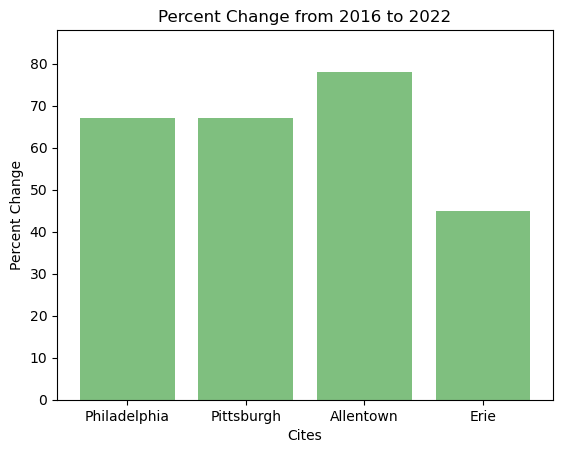

In [14]:
#Bar graph 
percent = [67, 67, 78, 45, ]
x_axis = ["Philadelphia","Pittsburgh","Allentown","Erie"]
plt.bar(x_axis, percent, color='g', alpha=0.5,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Philadelphia", "Pittsburgh", "Allentown", "Erie",])
plt.ylim(0, max(percent)+10)
plt.title("Percent Change from 2016 to 2022")
plt.xlabel("Cites")
plt.ylabel("Percent Change")

 

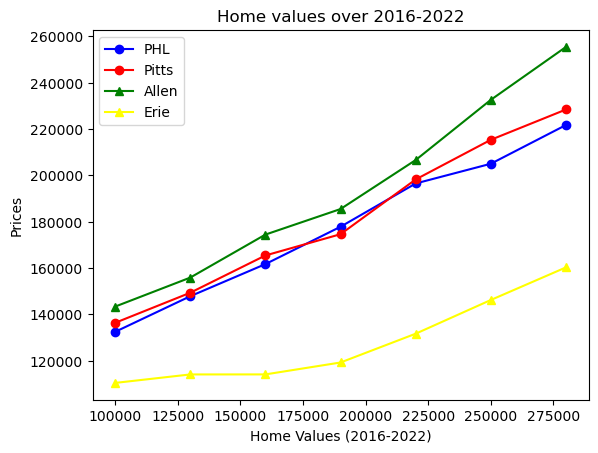

In [15]:
#create Line graph
x_axis = np.arange(100000, 300000, 30000)
phl= [132502,147876,161746,177871,196551,205065,221780] 
pitts=[136392,149388,165475,174658,198284,215399,228477]
allen=[143404,155922,174485,185522,206670,232649,255485]
erie=[110468,114128,114141,119285,131714,146265,160337]
plt.plot(x_axis, phl,marker ='o', color='blue', label="PHL")
plt.plot(x_axis, pitts, marker ='o', color='red', label="Pitts")
plt.plot(x_axis, allen, marker ='^', color='Green', label="Allen")
plt.plot(x_axis, erie,marker ='^', color='Yellow', label="Erie")
plt.xlabel("Home Values (2016-2022)")
plt.ylabel("Prices")
plt.legend(loc="upper left")
plt.title("Home values over 2016-2022")
plt.show()

In [72]:
#preview data
rental_cities_df.head()



,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2822.651771,2840.337155,...,3629.108860,3635.667432,3647.094597,3660.456743,3676.040047,3688.648459,3699.287512,3704.075776,3701.271206,3693.215524
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1948.241342,1959.798723,...,2904.757088,2911.829735,2918.057017,2922.805299,2930.923614,2937.166224,2943.588446,2938.673698,2933.895196,2925.013007
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1271.182161,1274.668263,...,1584.469389,1591.142831,1599.564579,1608.211669,1616.043944,1621.102095,1624.224636,1625.816795,1626.102862,1626.255419
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1600.671700,1602.178947,...,2027.767882,2042.907113,2055.159040,2066.529459,2075.515550,2081.769357,2085.289595,2091.504739,2099.842227,2106.287234
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1059.022244,1062.007188,...,1516.294124,1521.402659,1526.433552,1534.140682,1537.605416,1542.038267,1539.312966,1535.526893,1529.827844,1523.732684


In [95]:
# Narrow down dataframe to State = PA
# Narrow down dataframe to city = Philadelphia
PA_rent_df= rental_cities_df.loc[all_cities_df["State"]=="PA",:]
philadelphia_rent = PA_rent_df.loc[PA_rent_df["RegionName"]=="Philadelphia",:]
# reduce date to 2015-2023
philadelphia_rent_df = philadelphia_rent[['RegionID','RegionType','RegionName','State','CountyName','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
philadelphia_rent_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
5,13271,city,Philadelphia,PA,Philadelphia County,1380.498351,1420.081569,1469.767908,1520.437004,1526.535538,1657.409355,1730.873837


In [96]:
# Narrow down dataframe to city = Allentown
Allentown_rental = PA_rent_df.loc[PA_rent_df["RegionName"]=="Allentown",:]
# reduce date to 2015-2023
Allentown_rental_df = Allentown_rental[['RegionID','RegionType','RegionName','State','CountyName','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Allentown_rental_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
199,16726,city,Allentown,PA,Lehigh County,1090.508696,1156.131108,1191.915854,1255.194115,1365.655496,1597.902814,1668.875057


In [98]:
# Narrow down dataframe to city = Erie
Erie_rental = PA_rent_df.loc[PA_rent_df["RegionName"]=="Erie",:]
# reduce date to 2015-2023
Erie_rental_df = Erie_rental[['RegionID','RegionType','RegionName','State','CountyName','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Erie_rental_df.head()

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
194,11335,city,Erie,PA,Erie County,723.189218,756.064007,773.634293,773.084637,806.56173,876.106896,963.315719


In [97]:
# Narrow down dataframe to city = Pittsburgh
Pittsburgh_rental = PA_rent_df.loc[PA_rent_df["RegionName"]=="Pittsburgh",:]
# reduce date to 2015-2023
Pittsburgh_rental_df = Pittsburgh_rental[['RegionID','RegionType','RegionName','State','CountyName','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31']]
Pittsburgh_rental_df.head()


,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
31,26529,city,Pittsburgh,PA,Allegheny County,1092.410549,1138.108563,1184.958531,1225.865396,1246.289262,1350.468114,1442.175682


In [105]:
#Combine the data into a single dataset
all_rentals_complete = pd.concat([philadelphia_rent_df,Pittsburgh_rental_df,Allentown_rental_df,Erie_rental_df])
all_rentals_complete

,RegionID,RegionType,RegionName,State,CountyName,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
5,13271,city,Philadelphia,PA,Philadelphia County,1380.498351,1420.081569,1469.767908,1520.437004,1526.535538,1657.409355,1730.873837
31,26529,city,Pittsburgh,PA,Allegheny County,1092.410549,1138.108563,1184.958531,1225.865396,1246.289262,1350.468114,1442.175682
199,16726,city,Allentown,PA,Lehigh County,1090.508696,1156.131108,1191.915854,1255.194115,1365.655496,1597.902814,1668.875057
194,11335,city,Erie,PA,Erie County,723.189218,756.064007,773.634293,773.084637,806.561730,876.106896,963.315719


In [103]:
 #Calculate % change in home values from Dec 2015 to Dec 2022
rental_change_phl = (philadelphia_rent_df["2022-12-31"] - philadelphia_rent_df["2016-12-31"])/philadelphia_rent_df["2016-12-31"] * 100
rental_change_pitts = (Pittsburgh_rental_df["2022-12-31"] - Pittsburgh_rental_df["2016-12-31"])/Pittsburgh_rental_df["2016-12-31"] * 100
rental_change_ALL = (Allentown_rental_df["2022-12-31"] - Allentown_rental_df["2016-12-31"])/Allentown_rental_df["2016-12-31"] * 100
rental_change_Erie = (Erie_rental_df["2022-12-31"] - Erie_rental_df["2016-12-31"])/Erie_rental_df["2016-12-31"] * 100
all_change=pd.concat([rental_change_phl,rental_change_pitts,rental_change_ALL,rental_change_Erie,])
all_change_df= pd.DataFrame({
     "Cities":["Philadelphia","Pittsburgh","Allentown","Erie"],
      "Percent Change":["25%","32%","53%","33%"]
})
                    
all_change_df                                                                                           

,Cities,Percent Change
0,Philadelphia,25%
1,Pittsburgh,32%
2,Allentown,53%
3,Erie,33%


Text(0, 0.5, 'Percent Change')

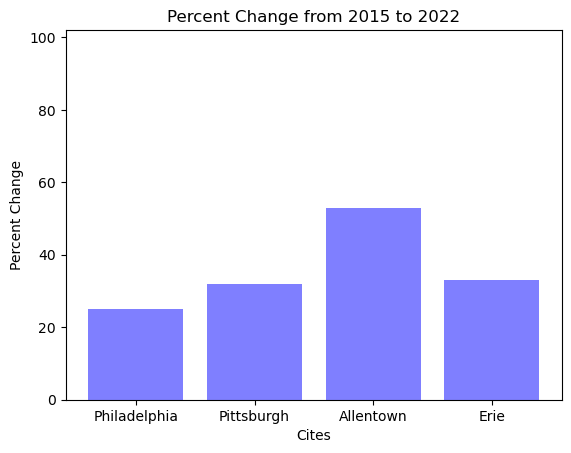

In [104]:
#Bar graph 
percent_1 = [25, 32, 53, 33, ]
x_axis_1 = ["Philadelphia","Pittsburgh","Allentown","Erie"]
plt.bar(x_axis_1, percent_1, color='b', alpha=0.5, align="center")
tick_locations_1 = [value for value in x_axis_1]
plt.xticks(tick_locations,["Philadelphia", "Pittsburgh", "Allentown", "Erie",])
plt.ylim(0, max(percent)+10)
plt.title("Percent Change from 2015 to 2022")
plt.xlabel("Cites")
plt.ylabel("Percent Change")
 

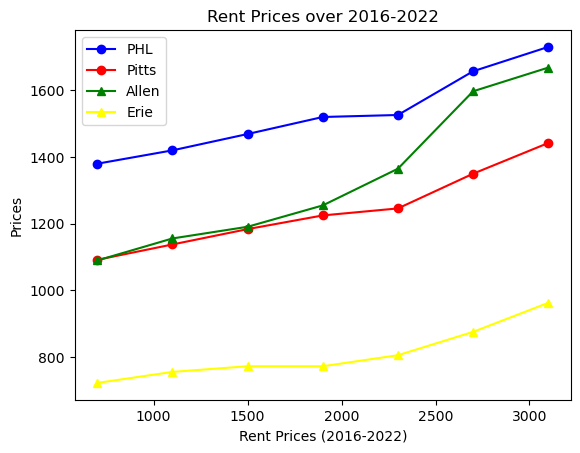

In [114]:
#create Line graph for rent
x_axis_1 = np.arange(700, 3500, 400)
phl= [1380,1420,1469,1520,1526,1657,1730] 
pitts=[1092,1138,1184,1225,1246,1350,1442]
allen=[1090,1156,1191,1255,1365,1597,1668]
erie=[723,756,773,773,806,876,963]
plt.plot(x_axis_1, phl,marker ='o', color='blue', label="PHL")
plt.plot(x_axis_1, pitts, marker ='o', color='red', label="Pitts")
plt.plot(x_axis_1, allen, marker ='^', color='Green', label="Allen")
plt.plot(x_axis_1, erie,marker ='^', color='Yellow', label="Erie")
plt.xlabel("Rent Prices (2016-2022)")
plt.ylabel("Prices")
plt.legend(loc="upper left")
plt.title("Rent Prices over 2016-2022")

plt.show()